<a href="https://colab.research.google.com/github/visithraravi98-lang/scratch-kmeans/blob/main/from_scratch_kmeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

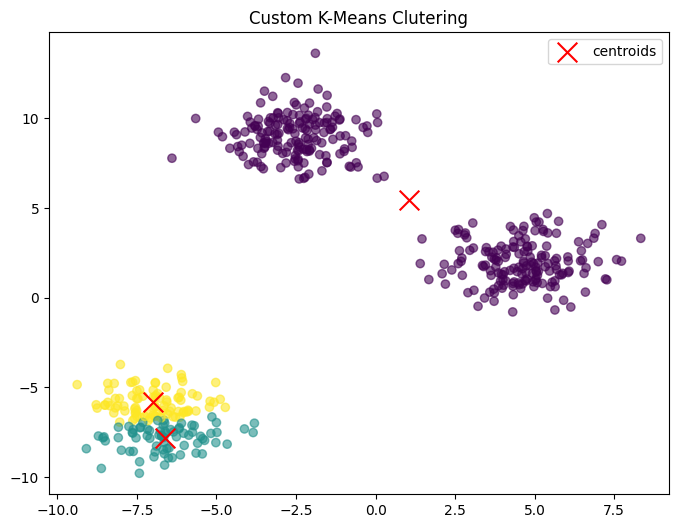

In [16]:
#Generate Synthetic dataset
np.random.seed(42)
x,y_true=make_blobs(n_samples=500,centers=3,n_features=2,cluster_std=1.2,random_state=42)

#K-Means implementation from scratch(Numpy only)
class KMeansScratch:
  def __init__(self,k=3,max_iters=100,tol=1e-4):
    self.k=k
    self.max_iters=max_iters
    self.tol=tol

  def fit(self,x):
    n_sampes=x.shape[0]
    random_idx=np.random.choice(n_sampes,self.k,replace=False)
    self.centroids=x[random_idx]
    for _ in range(self.max_iters):
      distances=np.linalg.norm(x[:, None]-self.centroids,axis=2)
      self.labels=np.argmin(distances,axis=1)
      new_centroids=np.array([x[self.labels==i].mean(axis=0) for i in range(self.k)])

      # Check for convergence
      if np.linalg.norm(self.centroids - new_centroids) < self.tol:
        self.centroids = new_centroids # Update centroids to the final converged state
        break

      self.centroids = new_centroids # Update centroids for the next iteration

    return self

#Apply custom K-Means
kmeans_custom=KMeansScratch(k=3)
kmeans_custom.fit(x)
custom_labels=kmeans_custom.labels
custom_centroids=kmeans_custom.centroids

#Visualization of custom K-Means Result
plt.figure(figsize=(8,6))
plt.scatter(x[:, 0],x[:, 1],c=custom_labels,cmap="viridis",alpha=0.6)
plt.scatter(custom_centroids[:, 0],custom_centroids[:, 1],c="red",marker="x",s=200,label="centroids")
plt.title("Custom K-Means Clutering")
plt.legend()
plt.show()

In [17]:
#silhouette score
custom_silhouette=silhouette_score(x, custom_labels)
print("custom K-Means Silhouette Score:",custom_silhouette)

#scikit-learn K-Means for comparison
sk_kmeans=KMeans(n_clusters=3,random_state=42,n_init=10)
sk_labels=sk_kmeans.fit_predict(x)
sk_silhouette=silhouette_score(x,sk_labels)
print("scikit-learn K-Means Silhouette Score:",sk_silhouette)

#final centroids
print("\nFinal Centroids(Custom K-Means):")
print(custom_centroids)
print("\nFinal Centroids(Scikit-learn K-Means):")
print(sk_kmeans.cluster_centers_)

#Stability Analysis
sse_values=[]
for i in range(10):
  model=KMeansScratch(k=3)
  model.fit(x)
  sse=np.sum([np.linalg.norm(x[j]-model.centroids[model.labels[j]])**2  for j in range(len(x))])
  sse_values.append(sse)
print("\nMean SSE:", np.mean(sse_values))
print("SSE Standard Deviation:",np.std(sse_values))

custom K-Means Silhouette Score: 0.5066116891901847
scikit-learn K-Means Silhouette Score: 0.8123331044995369

Final Centroids(Custom K-Means):
[[ 1.04740761  5.48131595]
 [-6.60832997 -7.83713364]
 [-6.99721619 -5.82093589]]

Final Centroids(Scikit-learn K-Means):
[[ 4.60901939  1.92357473]
 [-6.82151458 -6.73186861]
 [-2.51420417  9.03905718]]

Mean SSE: 3863.456068418863
SSE Standard Deviation: 3799.445608103131
